In [22]:
%run globals
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
# produce matlab-style plots
import matplotlib as mpl
import pickle
import os
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import scipy

# increase font size on plots
fontsize=15
font = {#'family' : 'normal',
        'weight' : 'ultralight',
        'size'   : 16}
matplotlib.rc('font', **font)
from matplotlib import rcParams
rcParams['axes.titlesize'] = 18
rcParams['font.weight'] = 'ultralight'
rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'cm'
# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 15})
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## unpack feedback controllers

each B has 11 participants and 8 stimulated frequencies

In [4]:
# load EMG 1st order feedback controllers
f = open("LNP_FB_1st_emg.pickle","rb")
B_fo_emg = pickle.load(f,encoding='latin1')
f.close()

# load manual 1st order feedback controllers
f = open("LNP_FB_1st_man.pickle","rb")
B_fo_man = pickle.load(f,encoding='latin1')
f.close()

# load EMG 2nd order feedback controllers
f = open("LNP_FB_2nd_emg.pickle","rb")
B_so_emg = pickle.load(f,encoding='latin1')
f.close()

# load manual 2nd order feedback controllers
f = open("LNP_FB_2nd_man.pickle","rb")
B_so_man = pickle.load(f,encoding='latin1')
f.close()

In [30]:
primes = np.asarray([2, 3, 5, 7, 11, 13, 17, 19])# max =37
soIX = primes*2
base = 20


freqs = primes/base
omegas = freqs*np.pi*2
s = 1j*omegas
xlim = (freqs[0]-.01,freqs[-1]+.1)
#xlim = (1.5/base,21.0/base)
Mfo = lambda s: 1/s
Mso = lambda s: 1/(s*(s+1))
s = 1j*omegas
phaseshift = np.pi/2

yticksmag = [1e-1,1e0,1e+1]
ytickslabelsmag = [r'$0.1$',r'$0.0$',r'$10.0$']

fontsize_math = fontsize + 1.5

ylimphase = (-1.1*np.pi,+1.1*np.pi)
yticksphase = [-np.pi,-np.pi/2,0.,np.pi/2,np.pi]
yticklabelsphase = [r'$-\frac{3\pi}{2}$',r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$+\frac{\pi}{2}$',r'$+\pi$']
yticksphase = [-np.pi-np.pi/2,-np.pi,-np.pi/2,0.,np.pi/2,np.pi]
# yticklabelsphase = [r'$-\pi$',r'0',r'$+\pi$']

lw = 1
markersize = 30
elinewidth = 2
linestyles = dict(F='-',B='-')

def bode_plot(data=None,fname=None,axs=None,color='k',fill=None,amean=0.,grid='on',ls='-',label=None,do_ylabels=False,title=None):
    if data is None:
        data = np.nan*freqs*np.zeros((3,1))
    
    if fill is None:
        fill = list(mpl.colors.to_rgba(color))
        fill[-1] = 0.5

    if axs is None:
        fig,axs = plt.subplots(2,1,sharex=True, figsize=(6,4))
        
    for ax in axs:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xscale("log")
    
    axm,axp = axs
    axm.set_yscale("log") 
    
    # magnitude
    d25,d50,d75 = np.percentile(np.abs(data),[25,50,75],axis=0)
    axm.fill_between(freqs,d25,d75,facecolor=fill,edgecolor='k',lw=lw)
    axm.plot(freqs,d50,color=color,lw=2*lw,zorder=1,ls=ls)
    #ax.plot(xlim,[1.,1.],'k--',zorder=-1)

    axm.set_xlim(xlim)
    axm.set_xticks([])
    axm.set_xticklabels([])
    
    axm.set_ylim((yticksmag[0],yticksmag[-1]))
    axm.set_yticks(yticksmag)
    axm.tick_params(axis='x',labelsize=fontsize)
    axm.tick_params(axis='y',labelsize=fontsize)
    if do_ylabels:
        axm.set_yticklabels(ytickslabelsmag[:3], fontsize=fontsize_math )
        # axm.set_yticklabels(axm.get_yticks(), **font)
#         axm.set_ylabel('gain',fontsize=fontsize)
    else:
        axm.set_yticklabels([])
    
    axm.grid(grid)
    
    # phase
    temp = np.angle(data)+phaseshift# np.unwrap(np.angle(data)*2)/2
    a = np.mod(temp+(amean-np.pi),2*np.pi)-(amean+np.pi) - phaseshift
#     a = np.mod(np.angle(data)+(amean-np.pi),2*np.pi)-(amean+np.pi)
    d25,d50,d75 = np.percentile(a,[25,50,75],axis=0)
    axp.fill_between(freqs,d25,d75,facecolor=fill,edgecolor='k',lw=lw,label=label)
    axp.plot(freqs,d50,color=color,lw=2*lw,zorder=1,ls=ls)

    axp.set_xlim(xlim)
    axp.set_xticks(freqs[:-1])
    axp.set_xticklabels(freqs[:-1],rotation=90)
#     axp.set_xlabel('frequency (Hz)',fontsize=fontsize)
    
    axp.set_ylim((yticksphase[0],yticksphase[2]))
    axp.set_yticks(yticksphase[:3])
    if do_ylabels:
        axp.set_yticklabels(yticklabelsphase[:3], fontsize=fontsize_math)
#         axp.set_ylabel('phase (radians)',fontsize=fontsize)
    else:
        axp.set_yticklabels([])
    axp.tick_params(axis='x',labelsize=fontsize)
    axp.tick_params(axis='y',labelsize=fontsize)
    axp.grid(grid)

    axp.legend(loc='lower center',ncol=4)
    
    if title is not None:
        axm.set_title(title)
    
    plt.tight_layout()
    
#     if fname is not None:
#         fig = plt.gcf()
#         for fmt in fmts:
#             if not(os.path.exists(fmt)): os.mkdir(fmt)
#             fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)
    
    return axs


# plot open loop transfer function

In [6]:
# load H estimates
f = open("emg_est","rb")
H_emg = pickle.load(f,encoding='latin1')
f.close()

f = open("man_est","rb")
H_man = pickle.load(f,encoding='latin1')
f.close()

# order k1, tau1, k2, tau2 for both
H_emg.shape,H_man

((4, 2),
 array([[2.08186662, 2.75535834],
        [0.28766559, 0.34059457],
        [1.53806937, 3.96714907],
        [0.2329401 , 0.4088054 ]]))

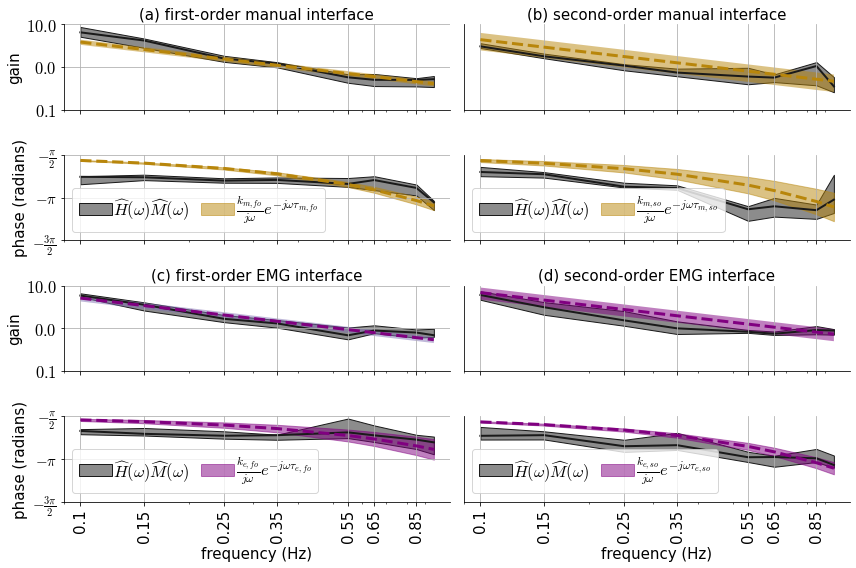

In [38]:
rcParams['mathtext.fontset'] = 'cm'

fig,axs = plt.subplots(4,2,figsize=(12,8),sharex=True)

B_label=r'$\frac{k}{j\omega}e^{-j\omega\tau}$'
data_label = r'$\widehat{H}(\omega)\widehat{M}(\omega)$'
color_man = 'darkgoldenrod'
color_emg = 'purple'
alpha = 0.5
# fontsize_legend = fontsize - 1.5
fontsize_legend = fontsize + 1.5

# EMG first order
ax = bode_plot(data=(B_fo_emg*Mfo(s)),axs=axs[2:4,0], do_ylabels=True,label=data_label)
axm,axp = ax
# plot fit B
axm.fill_between(freqs,abs(H_emg[0,0]/s),abs(H_emg[0,1]/s),facecolor='m',alpha=alpha)
axm.plot(freqs,abs(np.mean(H_emg[0])/s),color=color_emg,linestyle='--',linewidth=3)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_emg[1]))/s))-phaseshift,color=color_emg,linestyle='--',linewidth=3)
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[1,0])/s))-
                 phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[1,1])/s))-phaseshift,edgecolor=color_emg,lw=lw,facecolor=color_emg,alpha=alpha,
                 label=r'$\frac{k_{e,fo}}{j\omega}e^{-j\omega\tau_{e,fo}}$')
axp.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)
axm.set_title('(c) first-order EMG interface',fontsize = fontsize)
axp.set_xlabel('frequency (Hz)',fontsize=fontsize)
axp.set_ylabel('phase (radians)',fontsize=fontsize)
axm.set_ylabel('gain',fontsize=fontsize)
# fname='EMG_fo'
# if fname is not None:
#     fig = plt.gcf()
#     for fmt in fmts:
#         if not(os.path.exists(fmt)): os.mkdir(fmt)
#         fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

# manual FO
ax = bode_plot(data=(B_fo_man*Mfo(s)),axs=axs[0:2,0], do_ylabels=True,label=data_label)
axm,axp = ax
# plot fit B
axm.fill_between(freqs,abs(H_man[0,0]/s),abs(H_man[0,1]/s),facecolor=color_man,alpha=alpha)
axm.plot(freqs,abs(np.mean(H_man[0])/s),color=color_man,linestyle='--',linewidth=3)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_man[1]))/s))-phaseshift,color=color_man,linestyle='--',linewidth=3)
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[1,0])/s))-phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[1,1])/s))-
                 phaseshift,edgecolor=color_man,lw=lw,facecolor=color_man,alpha=alpha,label=r'$\frac{k_{m,fo}}{j\omega}e^{-j\omega\tau_{m,fo}}$')
axp.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)
axm.set_title('(a) first-order manual interface',fontsize = fontsize)
axp.set_ylabel('phase (radians)',fontsize=fontsize)
axm.set_ylabel('gain',fontsize=fontsize)

# EMG so
ax = bode_plot(data=(B_so_emg*Mso(s)),axs=axs[2:4,1], do_ylabels=True,label=data_label)
axm,axp = ax
axm.fill_between(freqs,abs(H_emg[2,0]/s),abs(H_emg[2,1]/s),facecolor=color_emg,alpha=alpha)
axm.plot(freqs,abs(np.mean(H_emg[2])/s),color=color_emg,linestyle='--',linewidth=3)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_emg[3]))/s))-phaseshift,color=color_emg,linestyle='--',linewidth=3)
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[3,0])/s))-phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[3,1])/s))-
                 phaseshift,edgecolor=color_emg,lw=lw,facecolor=color_emg,alpha=alpha,label=r'$\frac{k_{e,so}}{j\omega}e^{-j\omega\tau_{e,so}}$')
axp.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)
axm.set_title('(d) second-order EMG interface',fontsize = fontsize)
axp.set_xlabel('frequency (Hz)',fontsize=fontsize)
axm.set_yticks([])
axp.set_yticks([])

# manual SO
ax = bode_plot(data=(B_so_man*Mso(s)),axs=axs[0:2,1], do_ylabels=True,label=data_label)
axm,axp = ax
axm.fill_between(freqs,abs(H_man[2,0]/s),abs(H_man[2,1]/s),facecolor=color_man,alpha=alpha)
axm.plot(freqs,abs(np.mean(H_man[2])/s),color=color_man,linestyle='--',linewidth=3)
axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_man[3]))/s))-phaseshift,color=color_man,linestyle='--',linewidth=3)
axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[3,0] )/s))-phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[3,1])/s))-
                 phaseshift,edgecolor=color_man,lw=lw,facecolor=color_man,alpha=alpha,label=r'$\frac{k_{m,so}}{j\omega}e^{-j\omega\tau_{m,so}}$')
axp.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)
axm.set_title('(b) second-order manual interface',fontsize = fontsize)
axm.set_yticks([])
axp.set_yticks([])
plt.tight_layout()
fname='empiricalVSfitted'
if fname is not None:
    fig = plt.gcf()
    for fmt in fmts:
        if not(os.path.exists(fmt)): os.mkdir(fmt)
        fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)
fig = plt.gcf()
fig.savefig('CPHS delay fig 2_AC.svg')
plt.show()

In [8]:
# B_label=r'$\frac{k}{j\omega}e^{-j\omega\tau}$'
# data_label = r'$\widehat{H}(\omega)\widehat{M}(\omega)$'
# color_man = 'darkgoldenrod'
# color_emg = 'purple'
# alpha = 0.5
# fontsize_legend = fontsize - 1.5

# fig1,axs = bode_plot(data=(B_fo_emg*Mfo(s)),fname='EMG_fo', do_ylabels=True,label=data_label)
# axm,axp = axs
# # plot fit B
# axm.fill_between(freqs,abs(H_emg[0,0]/s),abs(H_emg[0,1]/s),facecolor='m',alpha=alpha)
# axm.plot(freqs,abs(np.mean(H_emg[0])/s),color=color_emg,linestyle='--',linewidth=3)
# axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_emg[1]))/s))-phaseshift,color=color_emg,linestyle='--',linewidth=3)
# axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[1,0])/s))-
#                  phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[1,1])/s))-phaseshift,edgecolor=color_emg,lw=lw,facecolor=color_emg,alpha=alpha,
#                  label=r'$\frac{k_{e,fo}}{j\omega}e^{-j\omega\tau_{e,fo}}$')
# plt.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)
# fname='EMG_fo'
# if fname is not None:
#     fig = plt.gcf()
#     for fmt in fmts:
#         if not(os.path.exists(fmt)): os.mkdir(fmt)
#         fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

# fig2,axs = bode_plot(data=(B_fo_man*Mfo(s)),fname='manual_fo', do_ylabels=True,label=data_label)
# axm,axp = axs
# # plot fit B
# axm.fill_between(freqs,abs(H_man[0,0]/s),abs(H_man[0,1]/s),facecolor=color_man,alpha=alpha)
# axm.plot(freqs,abs(np.mean(H_man[0])/s),color=color_man,linestyle='--',linewidth=3)
# axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_man[1]))/s))-phaseshift,color=color_man,linestyle='--',linewidth=3)
# axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[1,0])/s))-phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[1,1])/s))-
#                  phaseshift,edgecolor=color_man,lw=lw,facecolor=color_man,alpha=alpha,label=r'$\frac{k_{m,fo}}{j\omega}e^{-j\omega\tau_{m,fo}}$')
# plt.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)
# fname='manual_fo'
# if fname is not None:
#     fig = plt.gcf()
#     for fmt in fmts:
#         if not(os.path.exists(fmt)): os.mkdir(fmt)
#         fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

# fig3,axs = bode_plot(data=(B_so_emg*Mso(s)),fname='EMG_so', do_ylabels=True,label=data_label)
# axm,axp = axs
# axm.fill_between(freqs,abs(H_emg[2,0]/s),abs(H_emg[2,1]/s),facecolor=color_emg,alpha=alpha)
# axm.plot(freqs,abs(np.mean(H_emg[2])/s),color=color_emg,linestyle='--',linewidth=3)
# axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_emg[3]))/s))-phaseshift,color=color_emg,linestyle='--',linewidth=3)
# axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[3,0])/s))-phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_emg[3,1])/s))-
#                  phaseshift,edgecolor=color_emg,lw=lw,facecolor=color_emg,alpha=alpha,label=r'$\frac{k_{e,so}}{j\omega}e^{-j\omega\tau_{e,so}}$')
# plt.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)
# fname='EMG_so'
# if fname is not None:
#     fig = plt.gcf()
#     for fmt in fmts:
#         if not(os.path.exists(fmt)): os.mkdir(fmt)
#         fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

# fig4,axs = bode_plot(data=(B_so_man*Mso(s)),fname='manual_so', do_ylabels=True,label=data_label)
# axm,axp = axs
# axm.fill_between(freqs,abs(H_man[2,0]/s),abs(H_man[2,1]/s),facecolor=color_man,alpha=alpha)
# axm.plot(freqs,abs(np.mean(H_man[2])/s),color=color_man,linestyle='--',linewidth=3)
# axp.plot(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*np.mean(H_man[3]))/s))-phaseshift,color=color_man,linestyle='--',linewidth=3)
# axp.fill_between(freqs,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[3,0] )/s))-phaseshift,np.unwrap(phaseshift+np.angle(np.exp(-s*H_man[3,1])/s))-
#                  phaseshift,edgecolor=color_man,lw=lw,facecolor=color_man,alpha=alpha,label=r'$\frac{k_{m,so}}{j\omega}e^{-j\omega\tau_{m,so}}$')
# plt.legend(loc='lower left', prop={'size': fontsize_legend},ncol=2,handletextpad=0.1,columnspacing=.7)

# fname='manual_so'
# if fname is not None:
#     fig = plt.gcf()
#     for fmt in fmts:
#         if not(os.path.exists(fmt)): os.mkdir(fmt)
#         fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

# plt.show()

In [9]:
fig4

NameError: name 'fig4' is not defined

In [10]:
print('COMPARE KS')
# compare manual vs EMG 
manvsEMGfo = scipy.stats.ttest_ind_from_stats(np.mean(H_man[0]),(H_man[0,1]-H_man[0,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_emg[0]),(H_emg[0,1]-H_emg[0,0])/3.92*np.sqrt(11),11)
print('manual vs EMG first order:', manvsEMGfo.pvalue)

manvsEMGso = scipy.stats.ttest_ind_from_stats(np.mean(H_man[3]),(H_man[2,1]-H_man[2,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_emg[2]),(H_emg[2,1]-H_emg[2,0])/3.92*np.sqrt(11),11)
print('manual vs EMG second order:', manvsEMGso.pvalue)

# compare first vs second order
fovssoEMG = scipy.stats.ttest_ind_from_stats(np.mean(H_emg[0]),(H_emg[0,1]-H_emg[0,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_emg[2]),(H_emg[2,1]-H_emg[2,0])/3.92*np.sqrt(11),11)
print('fo vs so EMG:', fovssoEMG.pvalue)

fovssoman = scipy.stats.ttest_ind_from_stats(np.mean(H_man[0]),(H_man[0,1]-H_man[0,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_man[2]),(H_man[2,1]-H_man[2,0])/3.92*np.sqrt(11),11)
print('fo vs so manual:', fovssoman.pvalue)

COMPARE KS
manual vs EMG first order: 0.021582475087503643
manual vs EMG second order: 0.00034256137857582316
fo vs so EMG: 0.151261823353163
fo vs so manual: 0.6091808593205964


## plot just the delays

In [11]:
# compare manual vs EMG 
manvsEMGfo = scipy.stats.ttest_ind_from_stats(np.mean(H_man[1]),(H_man[1,1]-H_man[1,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_emg[1]),(H_emg[1,1]-H_emg[1,0])/3.92*np.sqrt(11),11)
print('manual vs EMG first order:', manvsEMGfo.pvalue)

manvsEMGso = scipy.stats.ttest_ind_from_stats(np.mean(H_man[3]),(H_man[3,1]-H_man[3,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_emg[3]),(H_emg[3,1]-H_emg[3,0])/3.92*np.sqrt(11),11)
print('manual vs EMG second order:', manvsEMGso.pvalue)

# compare first vs second order
fovssoEMG = scipy.stats.ttest_ind_from_stats(np.mean(H_emg[1]),(H_emg[1,1]-H_emg[1,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_emg[3]),(H_emg[3,1]-H_emg[3,0])/3.92*np.sqrt(11),11)
print('fo vs so EMG:', fovssoEMG.pvalue)

fovssoman = scipy.stats.ttest_ind_from_stats(np.mean(H_man[1]),(H_man[1,1]-H_man[1,0])/3.92*np.sqrt(11),11,
                                                                            np.mean(H_man[3]),(H_man[3,1]-H_man[3,0])/3.92*np.sqrt(11),11)
print('fo vs so manual:', fovssoman.pvalue)

manual vs EMG first order: 0.005049086040944307
manual vs EMG second order: 0.9895208031112886
fo vs so EMG: 0.005703206097251679
fo vs so manual: 0.887007011838566


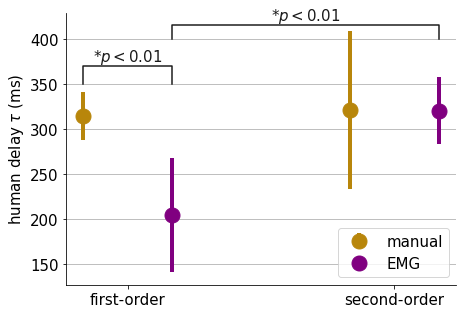

In [12]:
fig,ax = plt.subplots(figsize=(7,5))
xx = [0.95,1.05,1.25,1.35]
xticklabels = ['first-order','second-order']
markersize=15

ax.errorbar(xx[0],1000*np.mean(H_man[1]),yerr=1000*H_man[1,0]-1000*np.mean(H_man[1]),fmt='o',markersize=markersize,linewidth=4,color=color_man,label='manual')
ax.errorbar(xx[1],1000*np.mean(H_emg[1]),yerr=1000*H_emg[1,0]-1000*np.mean(H_emg[1]),fmt='o',markersize=markersize,linewidth=4,color=color_emg,label='EMG')
ax.errorbar(xx[2],1000*np.mean(H_man[3]),yerr=1000*H_man[3,0]-1000*np.mean(H_man[3]),fmt='o',markersize=markersize,linewidth=4,color=color_man)
ax.errorbar(xx[3],1000*np.mean(H_emg[3]),yerr=1000*H_emg[3,0]-1000*np.mean(H_emg[3]),fmt='o',markersize=markersize,linewidth=4,color=color_emg)
ax.set_xticks([np.mean(xx[:2]),np.mean(xx[2:])])
ax.set_xticklabels(xticklabels,fontsize=fontsize)
ax.set_ylabel(r'human delay $\tau$ (ms)',fontsize=fontsize)
ax.tick_params(axis='x',labelsize=fontsize)
ax.tick_params(axis='y',labelsize=fontsize)
plt.legend(loc='lower right',fontsize=fontsize)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y')

# plot pvalue 
y1 = 350
dist = 20
pos1 = xx[0]
pos2 = xx[1]
linewidth = 2
ax.plot([pos1,pos1,pos2,pos2],[y1,y1+dist,y1+dist,y1],lw=1.5,c='k')
ax.text((pos1+pos2)*.5,y1+dist,r'$*p<%1.2f$'%manvsEMGfo.pvalue,ha='center',va='bottom',color='k',fontsize=fontsize)

# plot pvalue 
y1 = 400
dist = 15
pos1 = xx[1]
pos2 = xx[3]
linewidth = 2
ax.plot([pos1,pos1,pos2,pos2],[y1,y1+dist,y1+dist,y1],lw=1.5,c='k')
ax.text((pos1+pos2)*.5,y1+dist,r'$*p<%1.2f$'%fovssoEMG.pvalue,ha='center',va='bottom',color='k',fontsize=fontsize)

fname = 'EMGdelay_varsplot'
if fname is not None:
    fig = plt.gcf()
if not(os.path.exists('pdf')): 
    os.mkdir('pdf')
fig.savefig(os.path.join('pdf',fname+'.'+'pdf'),bbox_inches='tight',pad_inches=0)

In [13]:
print('manual gain fo:',np.round(np.mean(H_man[0]),2),np.round((H_man[0,1]-H_man[0,0])/3.92*np.sqrt(11),2))
print('EMG gain fo:',np.round(np.mean(H_emg[0]),2),np.round((H_emg[0,1]-H_emg[0,0])/3.92*np.sqrt(11),2))

print('manual gain so:',np.round(np.mean(H_man[2]),2),np.round((H_man[2,1]-H_man[2,0])/3.92*np.sqrt(11),2))
print('EMG gain so:',np.round(np.mean(H_emg[2]),2),np.round((H_emg[2,1]-H_emg[2,0])/3.92*np.sqrt(11),2))

print('manual tau fo:',np.round(1000*np.mean(H_man[1]),1),np.round((1000*H_man[1,1]-1000*H_man[1,0])/3.92*np.sqrt(11),1))
print('EMG tau fo:',np.round(1000*np.mean(H_emg[1]),1),np.round((1000*H_emg[1,1]-1000*H_emg[1,0])/3.92*np.sqrt(11),1))

print('manual tau so:',np.round(1000*np.mean(H_man[3]),1),np.round((1000*H_man[3,1]-1000*H_man[3,0])/3.92*np.sqrt(11),1))
print('EMG tau so:',np.round(1000*np.mean(H_emg[3]),1),np.round((1000*H_emg[3,1]-1000*H_emg[3,0])/3.92*np.sqrt(11),1))

manual gain fo: 2.42 0.57
EMG gain fo: 3.22 0.9
manual gain so: 2.75 2.06
EMG gain so: 4.34 2.31
manual tau fo: 314.1 44.8
EMG tau fo: 203.7 107.3
manual tau so: 320.9 148.8
EMG tau so: 320.2 63.8
